## Newton Method

Este demo está extraido de: https://computationalthinking.mit.edu/Spring21/newton_method/
pero pasado a Jupyter. 

La primer parte está hecha para generar un enviroment (proyect) con todos los paquetes con su respectiva versión. Luego estos se borran al borrar el temp. 

In [1]:
#import Pkg
#Pkg.activate(mktempdir())
#Pkg.add([
#    Pkg.PackageSpec(name="ForwardDiff", version="0.10"),
#    Pkg.PackageSpec(name="Plots", version="1"),
#    Pkg.PackageSpec(name="LaTeXStrings", version="1"),
#    Pkg.PackageSpec(name="NonlinearSolve", version="0.3"),
#    Pkg.PackageSpec(name="StaticArrays", version="0.12")
#    ])
using ForwardDiff, Plots, LaTeXStrings, NonlinearSolve, StaticArrays

Vamos a hacer una versión gráfica del algoritmo de Newton-Raphson para ver como este converge a alguna de las raices de una función.

Recodemos que el método de Newton-Raphson se utiliza para encontrar raices de funciones 
(suficientemente suaves), es decir los valores $\{x^j\}$ donde $f(x^j) = 0$. 
El método requiere de un valor inicial $x_0$ y a partir del mismo define una sucesión de puntos
$\{x^j_i\}$ que convergen a la raíz $x^j$. *De ahora en más nos olvidaremos de las otras raices 
y pensaremos en una sola, a la que llamaremos $x$ y así no utilizaremos más el supra-
indice j.*

El algoritmo definiendo la sucesión es: 

$$
x_{i+1} = x_{i} - \frac{f(x_i)}{f'(x_i)},
$$
donde $f'$ la derivada de $f$.

La mejor manera de entender este ingenioso método es verlo gráficamente:

Primero definimos las líneas rectas que emplearemos para graficar las tangentes a las funciones:

In [2]:
straight(x0, y0, x, m) = m*(x-x0) + y0

straight (generic function with 1 method)

In [3]:
function standard_Newton(f, #función a encontrar la raíz
                         n, # número de iteracones
                         x_range, # rango para graficar 
                         x0, # valor inicial 
                         ymin=-10, ymax=10 #límites de integración
                        )
    
    # aquí usamos una librería para calcular la derivada automáticamente
    f′ = x -> ForwardDiff.derivative(f, x)

    #ploteamos la función 
	p = plot(f, x_range, lw=3, ylim=(ymin, ymax), legend=:false)
    # el punto inicial 
	scatter!([x0], [0], c="green", ann=(x0, -3, L"x_0", 10))
    # la línea del cero
	hline!([0.0], c="magenta", lw=3, ls=:dash)
    #comenzamos las iteraciones:
	for i in 1:n

		plot!([x0, x0], [0, f(x0)], c=:gray, alpha=0.5)
		scatter!([x0], [f(x0)], c=:red)
        #calculamos la tangente
		m = f′(x0)
        # graficamos la recta tangente 
		plot!(x_range, [straight(x0, f(x0), x, m) for x in x_range], c=:blue, alpha=0.5, ls=:dash, lw=2)
        #iteramos el paso (o sea encontramos el punto donde la recta corta el eje)
		x1 = x0 - f(x0) / m
		#scatter!([x1], [0], c="green", ann=(x1, -3, "x$i"))

		if i <= n
			scatter!([x1], [0], c="green", ann=(x1, -3, L"x_%$i", 10))
		end
		
		x0 = x1

	end

	#p |> as_svg
    display(p)

end

standard_Newton (generic function with 3 methods)

Ahora que tenemos una función para graficar el algoritmo lo aplicamos a varias funciones que definiremos a continuación. Note que las graficaremos para ver donde están aproximadamente los ceros previamente a aplicar el método. 

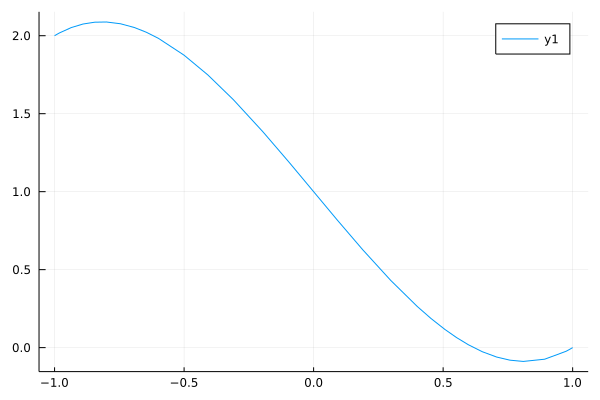

In [14]:
f(x) = x^3 -2x + 1
plot(f,-1,1)

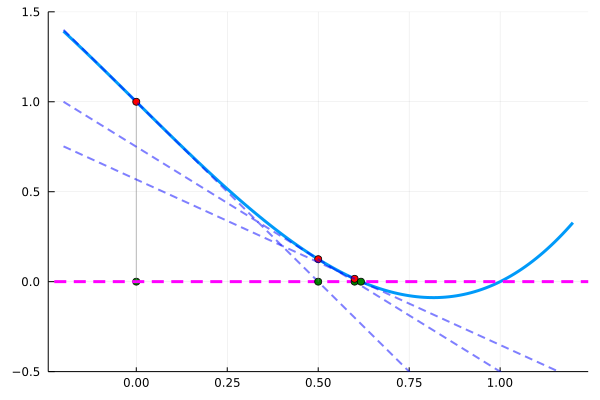

In [13]:
#f(x) = 2x^3 - 2x + 1 #(con un polo doble)
n = 3
x0 = 0.
standard_Newton(f, n, -0.2:0.01:1.2, x0, -0.5, 1.5)

## Tarea: 

### Defina varias funciones y juegue con el método. 
1. Cambie el número de iteraciones y el punto inicial.
2. Pruebe con raices simples y vea desde que puntos el algoritmo convege a cada una. Esa regiones se llaman las bases de atracción de la raíz de este método.
3. Vea que sucede si pone una raíz doble o de orden mayor.

## Un método cercano: el de la secante

Veamos como graficar el mismo y así entenderlo de la misma manera:

In [28]:
function secante(f, n, x_range, x0, x1, ymin=-10, ymax=10)
    l = -2
	p = plot(f, x_range, lw=3, ylim=(ymin, ymax), legend=:false)
    
    hline!([0.0], c="magenta", lw=3, ls=:dash)

	scatter!([x0], [0], c="green", ann=(x0, l, L"x_0", 10))
	scatter!([x1], [0], c="green", ann=(x1, l, L"x_1", 10))
    
	for i in 1:n

		plot!([x0, x0], [0, f(x0)], c=:gray, alpha=0.5)
        plot!([x1, x1], [0, f(x1)], c=:gray, alpha=0.5)
		scatter!([x0], [f(x0)], c=:red)
        scatter!([x1], [f(x1)], c=:red)
        
		m = (f(x1)-f(x0))/(x1-x0)

		plot!(x_range, [straight(x0, f(x0), x, m) for x in x_range], c=:blue, alpha=0.5, ls=:dash, lw=2)

		x2 = x0 - f(x0) / m
		#scatter!([x1], [0], c="green", ann=(x1, -3, "x$i"))

		if i <= n
			scatter!([x2], [0], c="green", ann=(x2, l, L"x_%$(i+1)", 10))
		end
		
		x0 = x1
        x1 = x2
        

	end

	#p |> as_svg
    display(p)

end

secante (generic function with 3 methods)

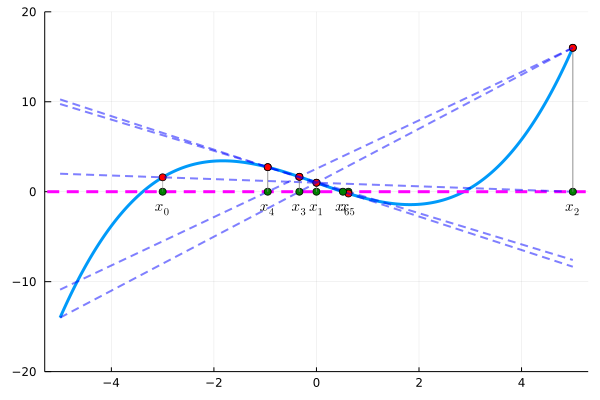

In [35]:

g(x) = 0.2*x^3 - 2x + 1
n = 5
x0 = -3.
x1 = 0.
secante(g, n, -5:0.01:5, x0, x1, -20, 20)

## Tarea: 

### Juegue con el algoritmo de la misma manera que hizo con el anterior.

In [ ]:
"Looks for x such that f(x) = y, i.e. f(x) - y = 0"
function inverse_N2D(f, y, x0=[0, 0])
	return newton2D(x -> f(x) - y, x0)
end

In [ ]:
function newton2D_step(T, x)
	
	J = ForwardDiff.jacobian(T, x)   # should use StaticVectors
	
	δ = J \ T(x)   # J^(-1) * T(x)
	
	return x - δ
end

In [ ]:
"Looks for x such that T(x) = 0"
function newton2D(T, x0, n=10)
	
	x = x0

	for i in 1:n
		x = newton2D_step(T, x)
	end
	
	return x
end

In [ ]:
T(v,p) = [0.5v[1] - v[2]^2;  0.5v[2] - v[1]^2]

In [ ]:
T([1 ; 2])

In [ ]:
x0 = [1.5 ; 0.5]
y = [-3.5 ; 0]
z = newton2D(x -> T(x) - y, x0, 20)

In [ ]:
T(z) - y

In [ ]:
function inverse(f, y, u0 = @SVector[0.0, 0.0])
    prob = NonlinearProblem{false}( (u, p) -> f(u, p) .- y, u0)
    solver = solve(prob, NewtonRaphson(), tol = 1e-9)
    return solver.u 
end
    
#inverse(f) = y -> inverse( (u, p) -> f(SVector(u...)), y )
#inverse(f) = y -> inverse( (u, p) -> f(SVector(u[1],u[2])), y )
inverse(T, y, x0)

In [ ]:
g(u,p) = u .* u .- 2
u0 = @SVector[1.0, 1.0]
probN = NonlinearProblem{false}(g, u0)
solver = solve(probN, NewtonRaphson(), tol = 1e-9)

In [ ]:
p = 0.
g(u0,p)

In [ ]:
tipo = Float64

In [ ]:
function NR(f,df,x₀,tolₓ=1.e-7,tol_f=1.e-7,max_iter=100)#x₀::tipo, tolₓ::tipo=1.e-7,tol_f::tipo=1.e-7,max_iter::Int64=100)
    x = x₀
    iter = 0
    Er = zeros(max_iter)
    dx = 1.
    while (abs(dx/x) > tolₓ) || (abs(f(x)) > tol_f) || iter < max_iter
        iter = iter + 1
        dx = f(x)/df(x)
        x = x - dx
        Er[iter] = abs(dx/x)
    end
    return (f(x), x, Er)
end

In [ ]:
function f(x::tipo)::tipo
    return (x-1)*x^3
end

function df(x::tipo)::tipo
    return x^3 + 3*(x-1)*x^2
end

In [ ]:
#x₀ = big"0.9"
x₀ = tipo(0.9)
f(5.)
df(5.)

In [ ]:
#t_x = tipo(10.0^20)
#t_f = tipo(10.0^20)
NR(f,df,x₀)

In [2]:
function NR_D(f,df,x₀,tolₓ=1.e-7,tol_f=1.e-7,max_iter=100)
    x = x₀
    iter = 0
    Er = zeros(max_iter)
    dx = 1.
    while (norm(dx)/norm(x) > tolₓ) || (norm(f(x)) > tol_f) || iter < max_iter
        iter = iter + 1
        dx = df(x) \ f(x)
        x = x - dx
        Er[iter] = norm(dx)/norm(x)
    end
    return (f(x), x, Er)
end

NR_D (generic function with 4 methods)